In [ ]:
!pip install wfdb
!pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
from google.colab import files
import zipfile
import io
import pandas as pd

# Upload the zipped dataset file
uploaded = files.upload()

# Extract the contents of the zip file
for filename in uploaded.keys():
    with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
        zip_ref.extractall('/content/mit-bih-dataset')
    print(f'Extracted {filename}')

# List the extracted files
import os
extracted_files = os.listdir('/content/mit-bih-dataset')
print('Extracted files:', extracted_files)

KeyboardInterrupt: 

In [ ]:
import os
import zipfile

# Path to the ZIP file in Google Drive
zip_file_path = '/content/mit-bih-arrhythmia-database-1.0.0.zip'
extract_to_path = '/content/mit-bih-dataset'

# Ensure the destination directory exists
os.makedirs(extract_to_path, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
    print(f'Extracted {zip_file_path}')

# List the extracted files
extracted_files = os.listdir(extract_to_path)
print('Extracted files:', extracted_files)

Extracted /content/mit-bih-arrhythmia-database-1.0.0.zip
Extracted files: ['mit-bih-arrhythmia-database-1.0.0']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# List files in a specific directory
path = '/content/drive/MyDrive/'
files = os.listdir(path)
for file in files:
    print(file)


maths project 2 pictures.doc
pic.gdoc
WT-13 MATHS (ASHWIN PHILIP(10RI1))ANSWER KEY.pdf
WT-18 ASHWIN PHILIP(10RI1)PHYSICS ANSWER KEY.pdf
Untitled document (46).gdoc
transformations.gdoc
conclusion.gdoc
w18 ashwin philip.pdf
WT20 CHEMISTRY ASHWIN PHILIP 10RI1 ANSWER KEY.pdf
jesc101.pdf
jesc103.pdf
jesc102.pdf
anthe brochure.gdoc
jesc102.gdoc
jesc103.gdoc
ASHWIN PHILIP 10RI1 BIOLOGY ANSWER KEY.pdf
MODEL EXAM 2021 10TH 
POINTS OF ENGLISH GRAMMAR.odt
to draw.odt
Declaration_21256241_2_24_2021 9_50_59 AM.pdf
REVISION 
wizard chess
COOKING COMPETISHUN.gdoc
Classroom
Copy of ATOMIC STRUCTURE lecture 1.gslides
gpt-vmzd-nmu - Jan 28, 2021.gjam
Untitled document (45).gdoc
Untitled document (44).gdoc
Untitled presentation (2).gslides
Untitled document (43).gdoc
Untitled presentation (1).gslides
ATOMIC STRUCTURE lecture 1.gslides
THUMBNAIL.gslides
CLASS 9
Project proposal (1).gdoc
T-Shirt Sign Up (1).gform
CLASS 11
DPP 
CLASS ROOM
Brochure.gdoc
Project.gsite
Philip George.gdoc
THE PORTRAIT OF A LAD

In [ ]:
import shutil
source = '/content/drive/MyDrive/mit-bih-arrhythmia-database-1.0.0.zip'
destination = '/content/mit-bih-arrhythmia-database-1.0.0.zip'
shutil.copy(source, destination)


'/content/mit-bih-arrhythmia-database-1.0.0.zip'

Extracted files: ['mit-bih-arrhythmia-database-1.0.0']


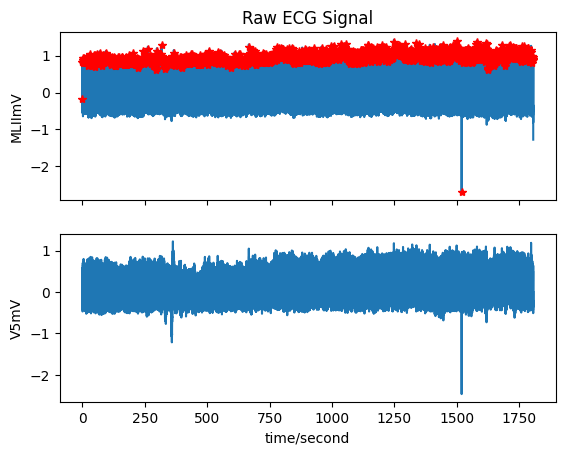

In [ ]:
import wfdb
import os
import matplotlib.pyplot as plt

# List the extracted files
extracted_files = os.listdir('/content/mit-bih-dataset')
print('Extracted files:', extracted_files)

# Load a sample record (replace '100' with the actual record name without extension)
record_name = '/content/mit-bih-dataset/mit-bih-arrhythmia-database-1.0.0/100'  # Adjust this based on actual file names
record = wfdb.rdrecord(record_name)
annotation = wfdb.rdann(record_name, 'atr')

# Plot the raw ECG data
wfdb.plot_wfdb(record=record, annotation=annotation, title='Raw ECG Signal')


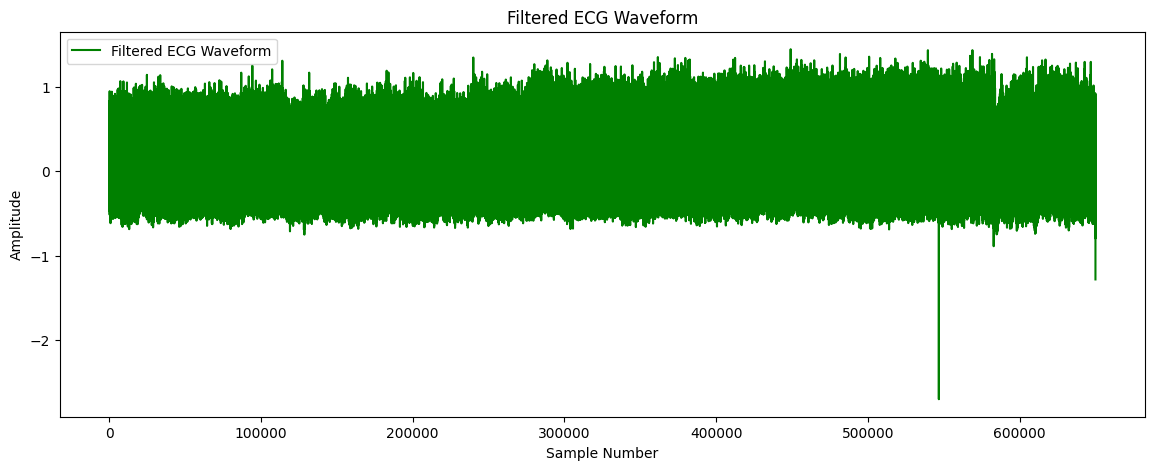

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt

# Butterworth filter function for noise removal
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters for the lowpass filter
cutoff_frequency = 50.0  # Hz
sampling_frequency = record.fs  # Sampling frequency from the record

# Apply the filter to the ECG signal
filtered_ecg_waveform = butter_lowpass_filter(record.p_signal[:, 0], cutoff_frequency, sampling_frequency)

# Plot the filtered ECG data
plt.figure(figsize=(14, 5))
plt.plot(filtered_ecg_waveform, label='Filtered ECG Waveform', color='green')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title('Filtered ECG Waveform')
plt.legend()
plt.show()


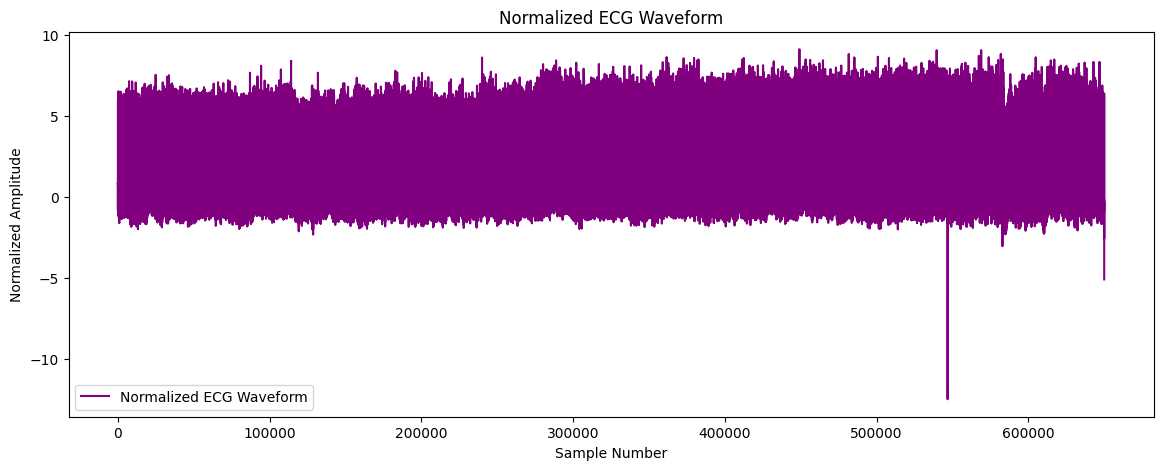

In [ ]:
# Normalize the data
normalized_ecg_waveform = (filtered_ecg_waveform - np.mean(filtered_ecg_waveform)) / np.std(filtered_ecg_waveform)

# Plot the normalized ECG data
plt.figure(figsize=(14, 5))
plt.plot(normalized_ecg_waveform, label='Normalized ECG Waveform', color='purple')
plt.xlabel('Sample Number')
plt.ylabel('Normalized Amplitude')
plt.title('Normalized ECG Waveform')
plt.legend()
plt.show()


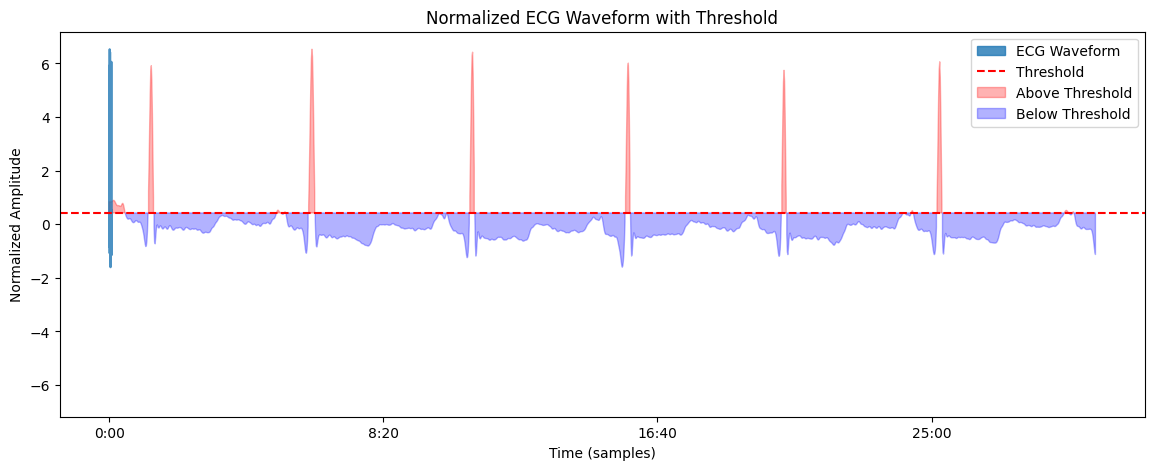

In [ ]:
import librosa.display

# Choose a segment of the ECG signal to plot (e.g., first 5 seconds)
num_seconds = 5
segment_length = int(num_seconds * sampling_frequency)
ecg_segment = normalized_ecg_waveform[:segment_length]

# Define the threshold such that P and T wave peaks are below it and R peak is above it
threshold = 0.42  # Adjust this threshold as needed

plt.figure(figsize=(14, 5))
librosa.display.waveshow(ecg_segment, sr=sampling_frequency, alpha=0.8, label='ECG Waveform')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')

above_threshold = ecg_segment > threshold
below_threshold = ecg_segment < threshold

plt.fill_between(np.arange(len(ecg_segment)), ecg_segment, threshold, where=above_threshold, color='red', alpha=0.3, label='Above Threshold')
plt.fill_between(np.arange(len(ecg_segment)), ecg_segment, threshold, where=below_threshold, color='blue', alpha=0.3, label='Below Threshold')

plt.xlabel('Time (samples)')
plt.ylabel('Normalized Amplitude')
plt.title('Normalized ECG Waveform with Threshold')
plt.legend()
plt.show()

PAN TOMPKINS R PEAKS

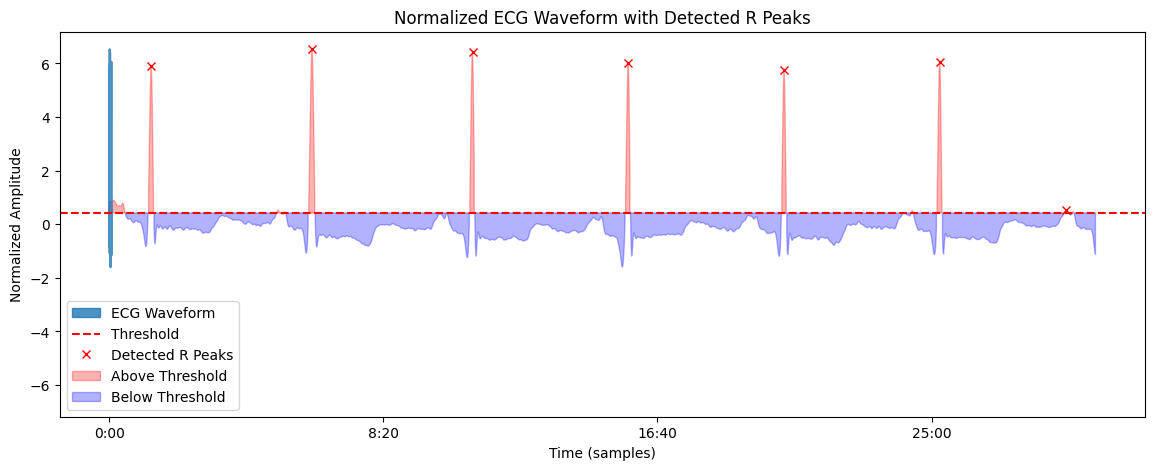

In [ ]:
# Detecting peaks in the thresholded ECG segment for the first 5 seconds
peaks, _ = find_peaks(ecg_segment, height=threshold, distance=sampling_frequency*0.6)

# Plot the thresholded ECG segment with detected R peaks
plt.figure(figsize=(14, 5))
librosa.display.waveshow(ecg_segment, sr=sampling_frequency, alpha=0.8, label='ECG Waveform')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.plot(peaks, ecg_segment[peaks], "x", label='Detected R Peaks', color='red')

above_threshold = ecg_segment > threshold
below_threshold = ecg_segment < threshold

plt.fill_between(np.arange(len(ecg_segment)), ecg_segment, threshold, where=above_threshold, color='red', alpha=0.3, label='Above Threshold')
plt.fill_between(np.arange(len(ecg_segment)), ecg_segment, threshold, where=below_threshold, color='blue', alpha=0.3, label='Below Threshold')

plt.xlabel('Time (samples)')
plt.ylabel('Normalized Amplitude')
plt.title('Normalized ECG Waveform with Detected R Peaks')
plt.legend()
plt.show()


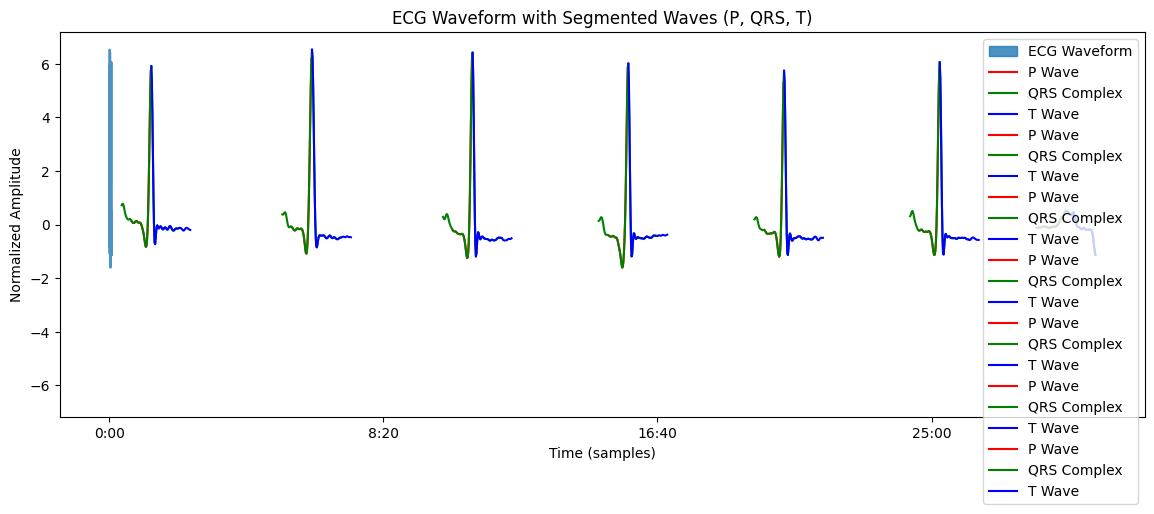

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from scipy.signal import find_peaks

# Define segment length (same as before)
num_seconds = 5
segment_length = int(num_seconds * sampling_frequency)

# Define window sizes for segmenting around R peaks
p_window = int(0.1 * sampling_frequency)  # 100 ms window for P wave
qrs_window = int(0.15 * sampling_frequency)  # 150 ms window for QRS complex
t_window = int(0.2 * sampling_frequency)  # 200 ms window for T wave

# Detect peaks in the ECG segment for the first 5 seconds
peaks, _ = find_peaks(ecg_segment[:segment_length], distance=sampling_frequency*0.6)

# Plot the ECG segment with detected peaks and segment lines
plt.figure(figsize=(14, 5))

# Plot the ECG waveform
librosa.display.waveshow(ecg_segment[:segment_length], sr=sampling_frequency, alpha=0.8, label='ECG Waveform')

# Segment and plot different waves
for i in range(len(peaks)):
    r_peak = peaks[i]

    # Define segment boundaries based on the R peak
    p_start = r_peak - p_window
    p_end = r_peak
    qrs_start = r_peak - qrs_window
    qrs_end = r_peak + qrs_window
    t_start = r_peak
    t_end = r_peak + t_window

    # Adjust segment boundaries to stay within the waveform limits
    if p_start < 0:
        p_start = 0
    if t_end > segment_length:
        t_end = segment_length

    # Segment the waveform into P, QRS, and T waves
    p_wave = ecg_segment[p_start:p_end]
    qrs_wave = ecg_segment[qrs_start:qrs_end]
    t_wave = ecg_segment[t_start:t_end]

    # Plot the segment with the determined color
    plt.plot(np.arange(p_start, p_end), p_wave, color='red', label='P Wave')
    plt.plot(np.arange(qrs_start, qrs_end), qrs_wave, color='green', label='QRS Complex')
    plt.plot(np.arange(t_start, t_end), t_wave, color='blue', label='T Wave')

    # Check if there's an overlap between P and T waves
    if i < len(peaks) - 1:
        next_r_peak = peaks[i + 1]
        if next_r_peak - r_peak < qrs_window:
            plt.plot(np.arange(p_start, p_end), p_wave, color='blue', label='T Wave')
            plt.plot(np.arange(qrs_start, qrs_end), qrs_wave, color='green', label='QRS Complex')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Time (samples)')
plt.ylabel('Normalized Amplitude')
plt.title('ECG Waveform with Segmented Waves (P, QRS, T)')

# Show plot
plt.show()


Peak-a-boo

In [ ]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from scipy.signal import butter, filtfilt
import librosa.display

In [ ]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import biosppy


# Choosing a segment of the ECG signal to analyze (first 5 seconds)
num_seconds = 5
segment_length = int(num_seconds * sampling_frequency)
ecg_segment = normalized_ecg_waveform[:segment_length]

# Analysing ECG signal using biosppy
ecg_analysis = biosppy.signals.ecg.ecg(signal=ecg_segment, sampling_rate=sampling_frequency, show=False)

# Extraction of R-peaks
rpeaks = ecg_analysis['rpeaks']

# Function to find P, Q, S, and T peaks around R-peaks
def find_pqrst_peaks(signal, r_peaks, sampling_rate):
    p_peaks = []
    q_peaks = []
    s_peaks = []
    t_peaks = []

    for r_peak in r_peaks:
        # Define windows for P, Q, and S peaks search
        p_window_start = max(0, r_peak - int(0.2 * sampling_rate))
        p_window_end = r_peak - int(0.05 * sampling_rate)
        q_window_start = r_peak - int(0.05 * sampling_rate)
        q_window_end = r_peak
        s_window_start = r_peak
        s_window_end = r_peak + int(0.05 * sampling_rate)
        t_window_start = s_window_end
        t_window_end = min(len(signal), s_window_end + int(0.4 * sampling_rate))

        # Find P peak
        p_window = signal[p_window_start:p_window_end]
        if len(p_window) > 0:
            p_peak = np.argmax(p_window) + p_window_start
            p_peaks.append(p_peak)

        # Find Q peak
        q_window = signal[q_window_start:q_window_end]
        if len(q_window) > 0:
            q_peak = np.argmin(q_window) + q_window_start
            q_peaks.append(q_peak)

        # Find S peak
        s_window = signal[s_window_start:s_window_end]
        if len(s_window) > 0:
            s_peak = np.argmin(s_window) + s_window_start
            s_peaks.append(s_peak)

        # Find T peak after S peak
        t_window = signal[t_window_start:t_window_end]
        if len(t_window) > 0:
            t_peak = np.argmax(t_window) + t_window_start
            t_peaks.append(t_peak)

    return np.array(p_peaks), np.array(q_peaks), np.array(s_peaks), np.array(t_peaks)

p_peaks, q_peaks, s_peaks, t_peaks = find_pqrst_peaks(ecg_segment, rpeaks, sampling_frequency)

# Ensuring P peak occurs before Q peak and T peak occurs after S peak
valid_p_peaks = []
valid_q_peaks = []
valid_s_peaks = []
valid_t_peaks = []

for i in range(len(rpeaks)):
    if i < len(p_peaks) and i < len(q_peaks) and p_peaks[i] < q_peaks[i]:
        valid_p_peaks.append(p_peaks[i])
        valid_q_peaks.append(q_peaks[i])
    if i < len(s_peaks) and i < len(t_peaks) and s_peaks[i] < t_peaks[i]:
        valid_s_peaks.append(s_peaks[i])
        valid_t_peaks.append(t_peaks[i])

valid_p_peaks = np.array(valid_p_peaks, dtype=int)
valid_q_peaks = np.array(valid_q_peaks, dtype=int)
valid_s_peaks = np.array(valid_s_peaks, dtype=int)
valid_t_peaks = np.array(valid_t_peaks, dtype=int)


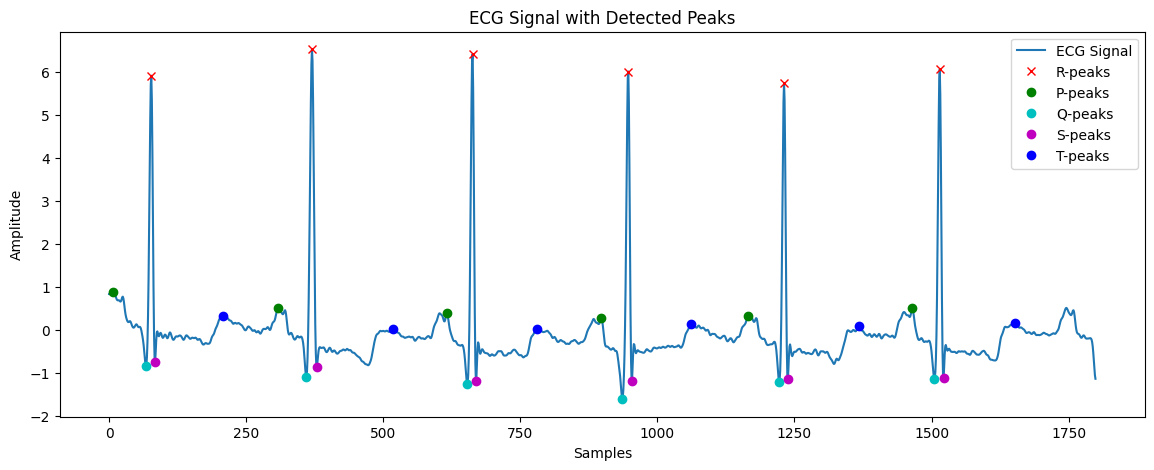

RR Intervals (s): [0.8138888888888889, 0.8138888888888889, 0.7888888888888889, 0.7888888888888889, 0.7888888888888889]
PP Intervals (s): [0.8333333333333334, 0.8555555555555555, 0.7833333333333333, 0.7444444444444445, 0.8305555555555556]
QRS Durations (s): [0.04722222222222222, 0.05277777777777778, 0.044444444444444446, 0.04722222222222222, 0.044444444444444446, 0.04722222222222222]
PR Intervals (s): [0.1638888888888889, 0.14444444444444443, 0.10277777777777777, 0.10555555555555556, 0.15555555555555556, 0.1111111111111111]
QT Intervals (s): [0.3888888888888889, 0.4388888888888889, 0.35555555555555557, 0.35, 0.4027777777777778, 0.4083333333333333]


In [ ]:
# Calculate PR and QT intervals
pr_intervals = []
qt_intervals = []
rr_intervals = [] # Calculating and storing RR intervals
pp_intervals = [] # Calculating and storing PP intervals
qrs_durations = [] # Calculating and storing QRS durations

for i in range(1, len(rpeaks)):
    rr_intervals.append((rpeaks[i] - rpeaks[i-1]) / sampling_frequency)

for i in range(1, len(valid_p_peaks)):
    pp_intervals.append((valid_p_peaks[i] - valid_p_peaks[i-1]) / sampling_frequency)

for q_peak, s_peak in zip(valid_q_peaks, valid_s_peaks): # Calculate QRS durations
    qrs_durations.append((s_peak - q_peak) / sampling_frequency)

for p_peak, q_peak, t_peak in zip(valid_p_peaks, valid_q_peaks, valid_t_peaks):
    pr_intervals.append((q_peak - p_peak) / sampling_frequency)
    qt_intervals.append((t_peak - q_peak) / sampling_frequency)

# Plotting ECG signal with detected peaks
plt.figure(figsize=(14, 5))
plt.plot(ecg_segment, label='ECG Signal')
plt.plot(rpeaks, ecg_segment[rpeaks], 'rx', label='R-peaks')
plt.plot(valid_p_peaks, ecg_segment[valid_p_peaks], 'go', label='P-peaks')
plt.plot(valid_q_peaks, ecg_segment[valid_q_peaks], 'co', label='Q-peaks')
plt.plot(valid_s_peaks, ecg_segment[valid_s_peaks], 'mo', label='S-peaks')
plt.plot(valid_t_peaks, ecg_segment[valid_t_peaks], 'bo', label='T-peaks')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('ECG Signal with Detected Peaks')
plt.legend()
plt.show()

# Print intervals and durations
print('RR Intervals (s):', rr_intervals)
print('PP Intervals (s):', pp_intervals)
print('QRS Durations (s):', qrs_durations)
print('PR Intervals (s):', pr_intervals)
print('QT Intervals (s):', qt_intervals)

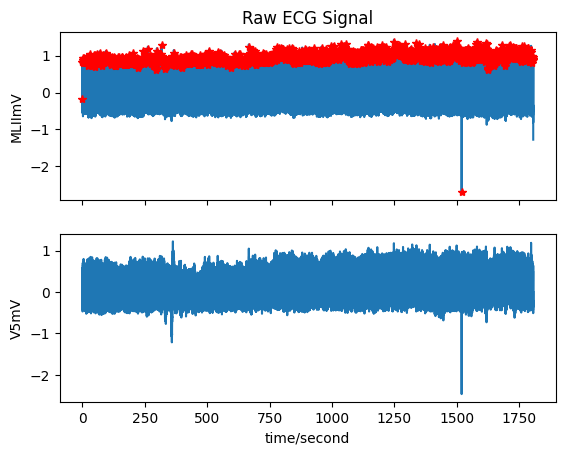

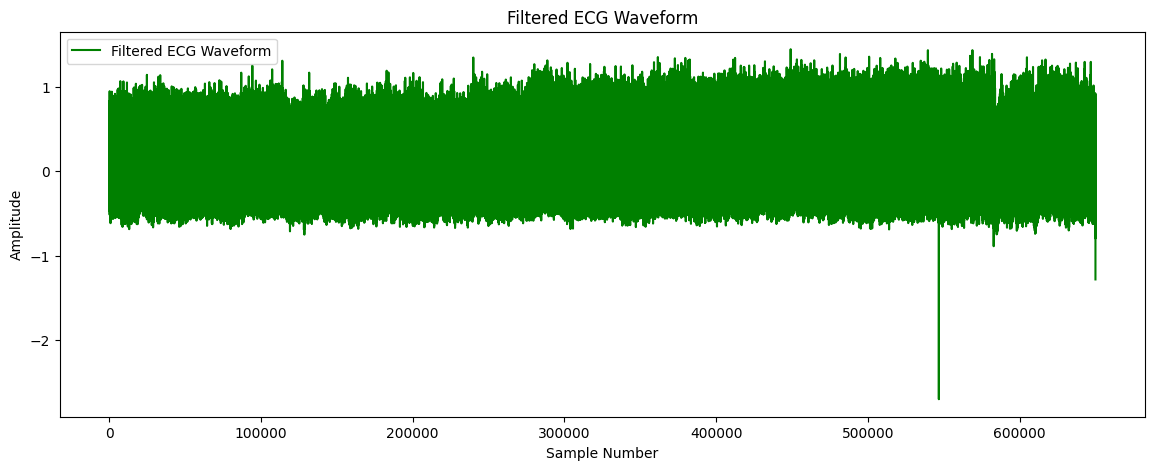

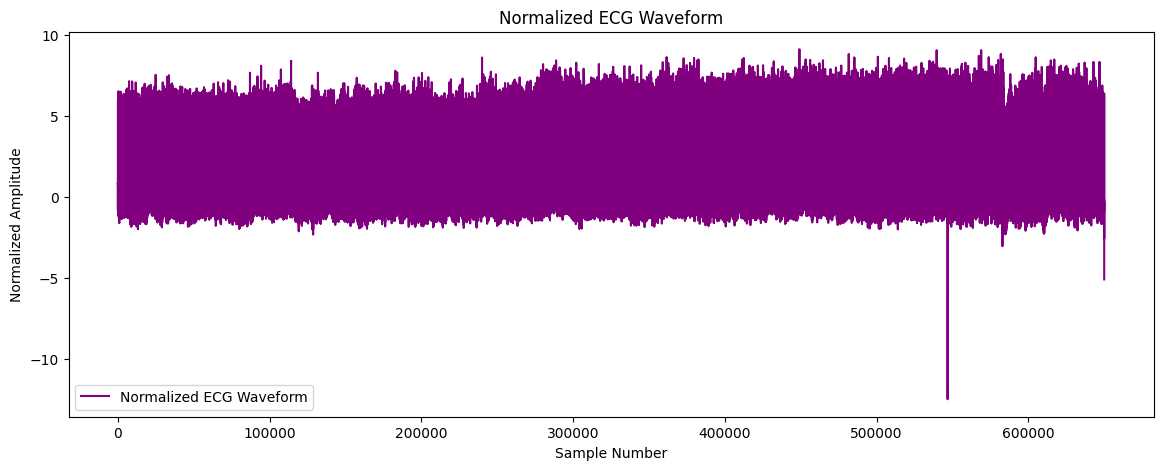

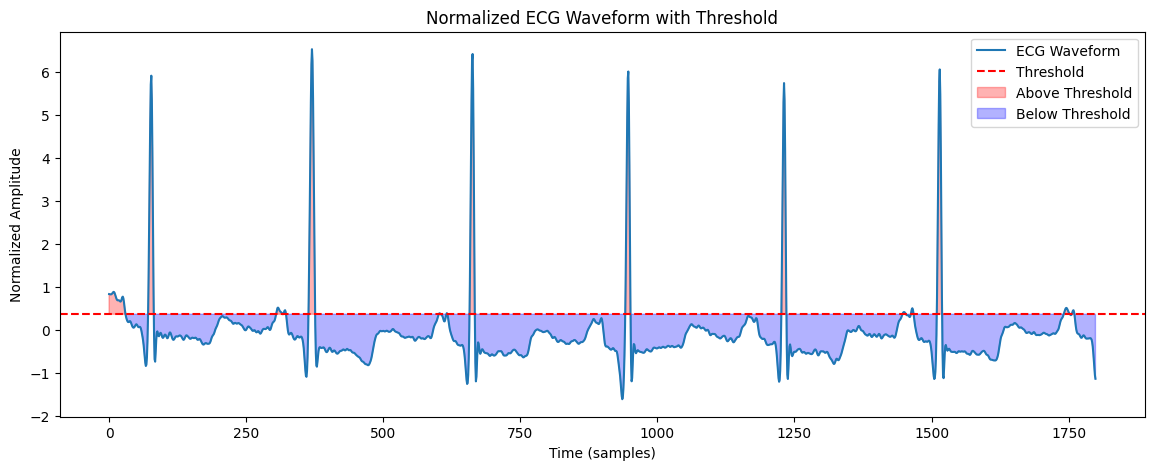

Epoch [1/20], Loss: 0.0014
Epoch [2/20], Loss: 0.0000
Epoch [3/20], Loss: 0.0004
Epoch [4/20], Loss: 0.0000
Epoch [5/20], Loss: 0.0000
Epoch [6/20], Loss: 0.0000
Epoch [7/20], Loss: 0.0021
Epoch [8/20], Loss: 0.0005
Epoch [9/20], Loss: 0.0128
Epoch [10/20], Loss: 0.0001
Epoch [11/20], Loss: 0.0354
Epoch [12/20], Loss: 0.0089
Epoch [13/20], Loss: 0.0015
Epoch [14/20], Loss: 0.0000
Epoch [15/20], Loss: 0.0022
Epoch [16/20], Loss: 0.0015
Epoch [17/20], Loss: 0.0181
Epoch [18/20], Loss: 0.0286
Epoch [19/20], Loss: 0.0000
Epoch [20/20], Loss: 0.0003


In [ ]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import biosppy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Step 1: Load and preprocess the ECG data

# Loading sample record
record_name = '/content/mit-bih-dataset/mit-bih-arrhythmia-database-1.0.0/100'
record = wfdb.rdrecord(record_name)
annotation = wfdb.rdann(record_name, 'atr')

# Plotting raw ECG data
wfdb.plot_wfdb(record=record, annotation=annotation, title='Raw ECG Signal')

# Butterworth filter function for noise removal
def butter_lowpass_filter(data, cutoff, fs, order=5):
    from scipy.signal import butter, filtfilt
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters for the lowpass filter
cutoff_frequency = 50.0  # Hz
sampling_frequency = record.fs  # Sampling frequency from the record

# Apply the filter to the ECG signal
filtered_ecg_waveform = butter_lowpass_filter(record.p_signal[:, 0], cutoff_frequency, sampling_frequency)

# Plot the filtered ECG data
plt.figure(figsize=(14, 5))
plt.plot(filtered_ecg_waveform, label='Filtered ECG Waveform', color='green')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title('Filtered ECG Waveform')
plt.legend()
plt.show()

# Normalize the data
normalized_ecg_waveform = (filtered_ecg_waveform - np.mean(filtered_ecg_waveform)) / np.std(filtered_ecg_waveform)

# Plot the normalized ECG data
plt.figure(figsize=(14, 5))
plt.plot(normalized_ecg_waveform, label='Normalized ECG Waveform', color='purple')
plt.xlabel('Sample Number')
plt.ylabel('Normalized Amplitude')
plt.title('Normalized ECG Waveform')
plt.legend()
plt.show()

# Choosing a segment of the ECG signal to plot (first 5 seconds)
num_seconds = 5
segment_length = int(num_seconds * sampling_frequency)
ecg_segment = normalized_ecg_waveform[:segment_length]

# Defining threshold such that P and T wave peaks are below it and R peak is above it
threshold = 0.37  # Adjusting threshold as needed

plt.figure(figsize=(14, 5))
plt.plot(ecg_segment, label='ECG Waveform')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')

above_threshold = ecg_segment > threshold
below_threshold = ecg_segment < threshold

plt.fill_between(np.arange(len(ecg_segment)), ecg_segment, threshold, where=above_threshold, color='red', alpha=0.3, label='Above Threshold')
plt.fill_between(np.arange(len(ecg_segment)), ecg_segment, threshold, where=below_threshold, color='blue', alpha=0.3, label='Below Threshold')

plt.xlabel('Time (samples)')
plt.ylabel('Normalized Amplitude')
plt.title('Normalized ECG Waveform with Threshold')
plt.legend()
plt.show()

# Analysing ECG signal using biosppy
ecg_analysis = biosppy.signals.ecg.ecg(signal=ecg_segment, sampling_rate=sampling_frequency, show=False)

# Extraction of R-peaks
rpeaks = ecg_analysis['rpeaks']

# Function to find P, Q, S, and T peaks around R-peaks
def find_pqrst_peaks(signal, r_peaks, sampling_rate):
    p_peaks = []
    q_peaks = []
    s_peaks = []
    t_peaks = []

    for r_peak in r_peaks:
        # Define windows for P, Q, and S peaks search
        p_window_start = max(0, r_peak - int(0.2 * sampling_rate))
        p_window_end = r_peak - int(0.05 * sampling_rate)
        q_window_start = r_peak - int(0.05 * sampling_rate)
        q_window_end = r_peak
        s_window_start = r_peak
        s_window_end = r_peak + int(0.05 * sampling_rate)
        t_window_start = s_window_end
        t_window_end = min(len(signal), s_window_end + int(0.4 * sampling_rate))

        # Find P peak
        p_window = signal[p_window_start:p_window_end]
        if len(p_window) > 0:
            p_peak = np.argmax(p_window) + p_window_start
            p_peaks.append(p_peak)

        # Find Q peak
        q_window = signal[q_window_start:q_window_end]
        if len(q_window) > 0:
            q_peak = np.argmin(q_window) + q_window_start
            q_peaks.append(q_peak)

        # Find S peak
        s_window = signal[s_window_start:s_window_end]
        if len(s_window) > 0:
            s_peak = np.argmin(s_window) + s_window_start
            s_peaks.append(s_peak)

        # Find T peak after S peak
        t_window = signal[t_window_start:t_window_end]
        if len(t_window) > 0:
            t_peak = np.argmax(t_window) + t_window_start
            t_peaks.append(t_peak)

    return np.array(p_peaks), np.array(q_peaks), np.array(s_peaks), np.array(t_peaks)

p_peaks, q_peaks, s_peaks, t_peaks = find_pqrst_peaks(ecg_segment, rpeaks, sampling_frequency)

# Ensuring P peak occurs before Q peak and T peak occurs after S peak
valid_p_peaks = []
valid_q_peaks = []
valid_s_peaks = []
valid_t_peaks = []

for i in range(len(rpeaks)):
    if i < len(p_peaks) and i < len(q_peaks) and p_peaks[i] < q_peaks[i]:
        valid_p_peaks.append(p_peaks[i])
        valid_q_peaks.append(q_peaks[i])
    if i < len(s_peaks) and i < len(t_peaks) and s_peaks[i] < t_peaks[i]:
        valid_s_peaks.append(s_peaks[i])
        valid_t_peaks.append(t_peaks[i])

valid_p_peaks = np.array(valid_p_peaks, dtype=int)
valid_q_peaks = np.array(valid_q_peaks, dtype=int)
valid_s_peaks = np.array(valid_s_peaks, dtype=int)
valid_t_peaks = np.array(valid_t_peaks, dtype=int)

# Prepare the sequences and labels
window_size = 250

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequence = data[i:i+window_size]
        label = int(data[i+window_size] > threshold)  # Assuming label based on threshold
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequences, labels = create_sequences(normalized_ecg_waveform, window_size)



# Convert to PyTorch tensors
sequences = torch.tensor(sequences, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.float32)

# Reshape sequences to include a "feature" dimension
# The LSTM expects input in the shape (batch_size, sequence_length, input_size)
sequences = sequences.unsqueeze(2)  # Adds a dimension at index 2

# Create DataLoader
batch_size = 64
dataset = TensorDataset(sequences, labels)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 2: Define the LSTM model

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sigmoid(out)
        return out

input_size = sequences.shape[2]
hidden_size = 128
num_layers = 2
output_size = 1

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)

# Step 3: Train the LSTM model

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20

model.train()
for epoch in range(num_epochs):
    for sequences_batch, labels_batch in dataloader:
        sequences_batch, labels_batch = sequences_batch.to(device), labels_batch.to(device)

        outputs = model(sequences_batch)
        loss = criterion(outputs, labels_batch.unsqueeze(1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


GRU Architecture

In [ ]:
Input_Sample = Input(shape=(1,52))

model_conv = Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(Input_Sample)
model_conv = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(model_conv)
model_conv = BatchNormalization()(model_conv)

model_conv = Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu')(model_conv)
model_conv = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(model_conv)
model_conv = BatchNormalization()(model_conv)

model_2_1 = GRU(32,return_sequences=True,activation='tanh',go_backwards=True)(model_conv)
model_2 = GRU(128,return_sequences=True, activation='tanh',go_backwards=True)(model_2_1)

model_3 = GRU(64,return_sequences=True,activation='tanh',go_backwards=True)(model_conv)
model_3 = GRU(128,return_sequences=True, activation='tanh',go_backwards=True)(model_3)

model_x = GRU(64,return_sequences=True,activation='tanh',go_backwards=True)(model_conv)
model_x = GRU(128,return_sequences=True, activation='tanh',go_backwards=True)(model_x)

model_add_1 = add([model_3,model_2,model_x])

model_5 = GRU(128,return_sequences=True,activation='tanh',go_backwards=True)(model_add_1)
model_5 = GRU(32,return_sequences=True, activation='tanh',go_backwards=True)(model_5)

model_6 = GRU(64,return_sequences=True,activation='tanh',go_backwards=True)(model_add_1)
model_6 = GRU(32,return_sequences=True, activation='tanh',go_backwards=True)(model_6)

model_add_2 = add([model_5,model_6,model_2_1])


model_7 = Dense(32, activation=None)(model_add_2)
model_7 = LeakyReLU()(model_7)
model_7 = Dense(128, activation=None)(model_7)
model_7 = LeakyReLU()(model_7)

model_9 = Dense(64, activation=None)(model_add_2)
model_9 = LeakyReLU()(model_9)
model_9 = Dense(128, activation=None)(model_9)
model_9 = LeakyReLU()(model_9)

model_add_3 = add([model_7,model_9])

model_10 = Dense(64, activation=None)(model_add_3)
model_10 = LeakyReLU()(model_10)

model_10 = Dense(32, activation=None)(model_10)
model_10 = LeakyReLU()(model_10)

model_10 = Dense(5, activation="softmax")(model_10)

gru_model = Model(inputs=Input_Sample, outputs = model_10)

gru_model.summary()

NameError: name 'Input' is not defined

Peak-a-boo -- 1

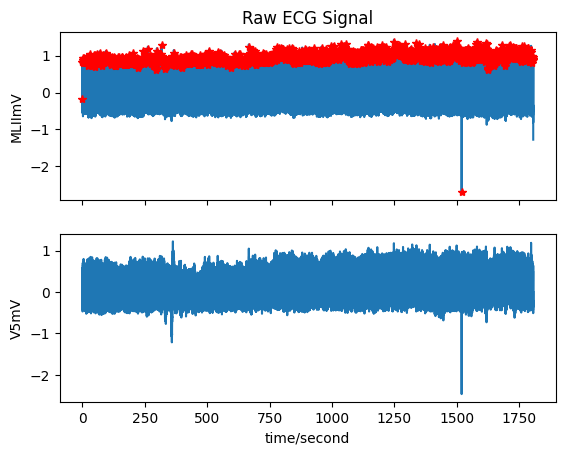

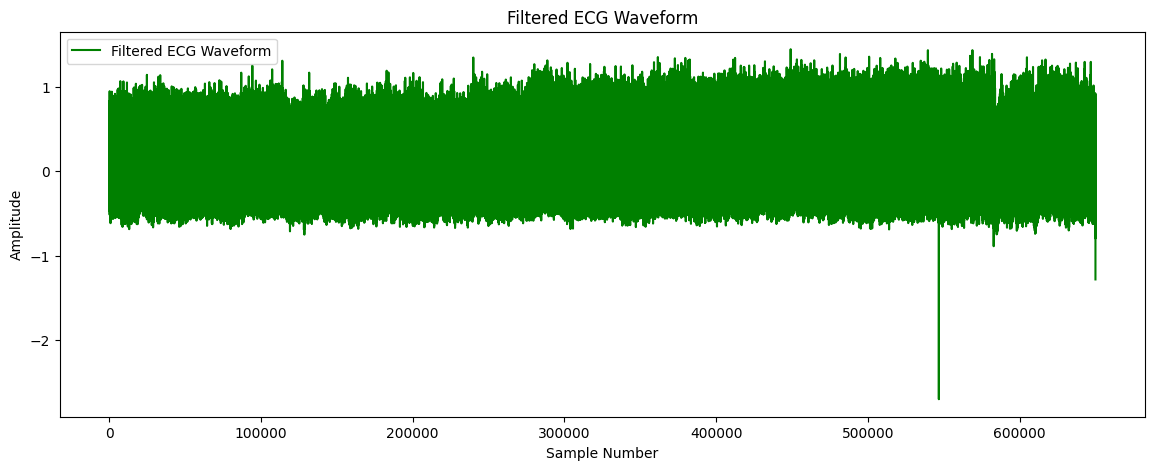

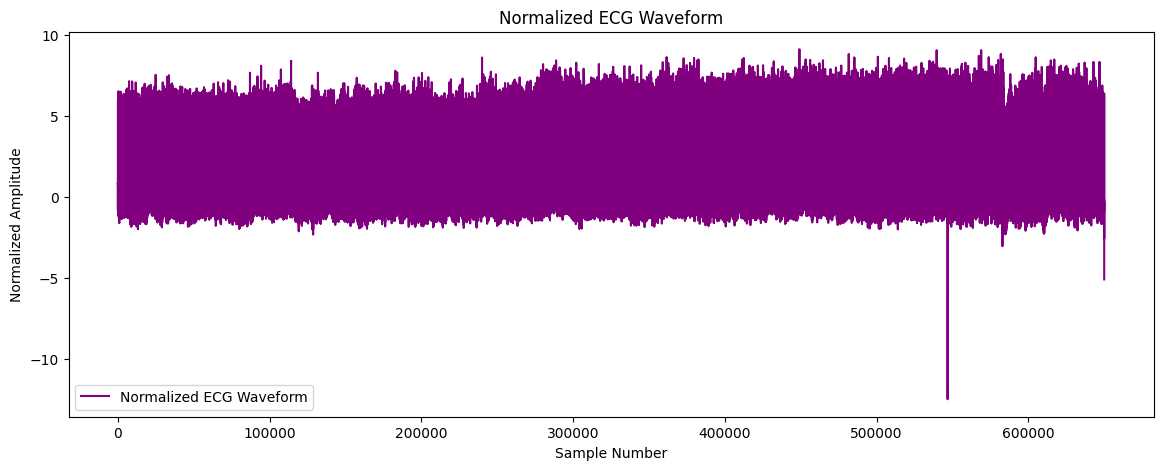

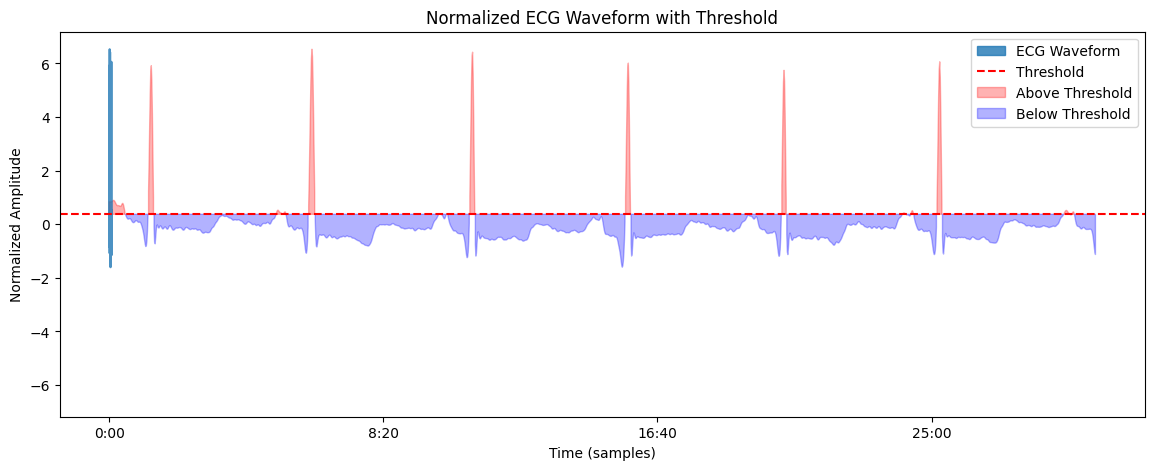

RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

In [ ]:


# Step 1: Load and preprocess the ECG data

# Loading sample record
record_name = '/content/mit-bih-dataset/mit-bih-arrhythmia-database-1.0.0/100'
record = wfdb.rdrecord(record_name)
annotation = wfdb.rdann(record_name, 'atr')

# Plotting raw ECG data
wfdb.plot_wfdb(record=record, annotation=annotation, title='Raw ECG Signal')

# Butterworth filter function for noise removal
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters for the lowpass filter
cutoff_frequency = 50.0  # Hz
sampling_frequency = record.fs  # Sampling frequency from the record

# Apply the filter to the ECG signal
filtered_ecg_waveform = butter_lowpass_filter(record.p_signal[:, 0], cutoff_frequency, sampling_frequency)

# Plot the filtered ECG data
plt.figure(figsize=(14, 5))
plt.plot(filtered_ecg_waveform, label='Filtered ECG Waveform', color='green')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title('Filtered ECG Waveform')
plt.legend()
plt.show()

# Normalize the data
normalized_ecg_waveform = (filtered_ecg_waveform - np.mean(filtered_ecg_waveform)) / np.std(filtered_ecg_waveform)

# Plot the normalized ECG data
plt.figure(figsize=(14, 5))
plt.plot(normalized_ecg_waveform, label='Normalized ECG Waveform', color='purple')
plt.xlabel('Sample Number')
plt.ylabel('Normalized Amplitude')
plt.title('Normalized ECG Waveform')
plt.legend()
plt.show()

# Choosing a segment of the ECG signal to plot (first 5 seconds)
num_seconds = 5
segment_length = int(num_seconds * sampling_frequency)
ecg_segment = normalized_ecg_waveform[:segment_length]

# Defining threshold such that P and T wave peaks are below it and R peak is above it
threshold = 0.37  # Adjusting threshold as needed

plt.figure(figsize=(14, 5))
librosa.display.waveshow(ecg_segment, sr=sampling_frequency, alpha=0.8, label='ECG Waveform')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')

above_threshold = ecg_segment > threshold
below_threshold = ecg_segment < threshold

plt.fill_between(np.arange(len(ecg_segment)), ecg_segment, threshold, where=above_threshold, color='red', alpha=0.3, label='Above Threshold')
plt.fill_between(np.arange(len(ecg_segment)), ecg_segment, threshold, where=below_threshold, color='blue', alpha=0.3, label='Below Threshold')

plt.xlabel('Time (samples)')
plt.ylabel('Normalized Amplitude')
plt.title('Normalized ECG Waveform with Threshold')
plt.legend()
plt.show()

# Analysing ECG signal using biosppy
ecg_analysis = biosppy.signals.ecg.ecg(signal=ecg_segment, sampling_rate=sampling_frequency, show=False)

# Extraction of R-peaks
rpeaks = ecg_analysis['rpeaks']

# Function to find P, Q, S, and T peaks around R-peaks
def find_pqrst_peaks(signal, r_peaks, sampling_rate):
    p_peaks = []
    q_peaks = []
    s_peaks = []
    t_peaks = []

    for r_peak in r_peaks:
        # Define windows for P, Q, and S peaks search
        p_window_start = max(0, r_peak - int(0.2 * sampling_rate))
        p_window_end = r_peak - int(0.05 * sampling_rate)
        q_window_start = r_peak - int(0.05 * sampling_rate)
        q_window_end = r_peak
        s_window_start = r_peak
        s_window_end = r_peak + int(0.05 * sampling_rate)
        t_window_start = s_window_end
        t_window_end = min(len(signal), s_window_end + int(0.4 * sampling_rate))

        # Find P peak
        p_window = signal[p_window_start:p_window_end]
        if len(p_window) > 0:
            p_peak = np.argmax(p_window) + p_window_start
            p_peaks.append(p_peak)

        # Find Q peak
        q_window = signal[q_window_start:q_window_end]
        if len(q_window) > 0:
            q_peak = np.argmin(q_window) + q_window_start
            q_peaks.append(q_peak)

        # Find S peak
        s_window = signal[s_window_start:s_window_end]
        if len(s_window) > 0:
            s_peak = np.argmin(s_window) + s_window_start
            s_peaks.append(s_peak)

        # Find T peak after S peak
        t_window = signal[t_window_start:t_window_end]
        if len(t_window) > 0:
            t_peak = np.argmax(t_window) + t_window_start
            t_peaks.append(t_peak)

    return np.array(p_peaks), np.array(q_peaks), np.array(s_peaks), np.array(t_peaks)

p_peaks, q_peaks, s_peaks, t_peaks = find_pqrst_peaks(ecg_segment, rpeaks, sampling_frequency)

# Ensuring P peak occurs before Q peak and T peak occurs after S peak
valid_p_peaks = []
valid_q_peaks = []
valid_s_peaks = []
valid_t_peaks = []

for i in range(len(rpeaks)):
    if i < len(p_peaks) and i < len(q_peaks) and p_peaks[i] < q_peaks[i]:
        valid_p_peaks.append(p_peaks[i])
        valid_q_peaks.append(q_peaks[i])
    if i < len(s_peaks) and i < len(t_peaks) and s_peaks[i] < t_peaks[i]:
        valid_s_peaks.append(s_peaks[i])
        valid_t_peaks.append(t_peaks[i])

valid_p_peaks = np.array(valid_p_peaks, dtype=int)
valid_q_peaks = np.array(valid_q_peaks, dtype=int)
valid_s_peaks = np.array(valid_s_peaks, dtype=int)
valid_t_peaks = np.array(valid_t_peaks, dtype=int)

# Prepare the sequences and labels
window_size = 250

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequence = data[i:i+window_size]
        label = int(data[i+window_size] > threshold)  # Assuming label based on threshold
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequences, labels = create_sequences(normalized_ecg_waveform, window_size)

# Convert to PyTorch tensors
sequences = torch.tensor(sequences, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.float32)

# Create DataLoader
batch_size = 64
dataset = TensorDataset(sequences, labels)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 2: Define the LSTM model

# Step 2: Define the LSTM model

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size): # Fixed typo _init_ to __init__
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sigmoid(out)
        return out

input_size = sequences.shape[2] # Changed index to 1 to get sequence length
hidden_size = 128
num_layers = 2
output_size = 1

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)

# ... (rest of the code remains the same)

# Step 3: Train the LSTM model

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20

model.train()
for epoch in range(num_epochs):
    for sequences_batch, labels_batch in dataloader:
        sequences_batch, labels_batch = sequences_batch.to(device), labels_batch.to(device)

        outputs = model(sequences_batch)
        loss = criterion(outputs, labels_batch.unsqueeze(1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 4: Evaluate the model
'''
# Assuming you have a test dataset prepared similarly
test_file_path = 'path_to_your_test_csv_file.csv'
test_data = pd.read_csv(test_file_path)
test_data = (test_data - test_data.mean()) / test_data.std()
test_data_np = test_data.to_numpy()

test_sequences, test_labels = create_sequences(test_data_np, window_size)
test_sequences = torch.tensor(test_sequences, dtype=torch.float32).to(device)
test_labels = torch.tensor(test_labels, dtype=torch.float32).to(device)

model.eval()
with torch.no_grad():
    outputs = model(test_sequences)
    predictions = (outputs > 0.5).float()
    accuracy = (predictions.squeeze() == test_labels).float().mean()
    print(f'Accuracy: {accuracy.item():.4f}')
'''